In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
import statsmodels.api as sm

# Download Market Data

In [2]:
ticker = "SPY"
start_date = "2014-01-01"
end_date = "2026-02-08" 

In [ ]:
# data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
# data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2014-01-02,148.986023,182.919998,184.070007,182.479996,183.979996,119636900
2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200
2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300
...,...,...,...,...,...,...
2026-02-02,695.409973,695.409973,696.929993,689.419983,689.580017,79286500
2026-02-03,689.530029,689.530029,696.960022,684.030029,696.210022,107904600


In [ ]:
# data.columns

MultiIndex([('Adj Close', 'SPY'),
            (    'Close', 'SPY'),
            (     'High', 'SPY'),
            (      'Low', 'SPY'),
            (     'Open', 'SPY'),
            (   'Volume', 'SPY')],
           names=['Price', 'Ticker'])

In [ ]:
# data.shape

(3043, 6)

In [ ]:
# data.columns.nlevels

2

In [ ]:
# data.columns = data.columns.droplevel(1)

In [ ]:
# data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02,148.986023,182.919998,184.070007,182.479996,183.979996,119636900
2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200
2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300


In [ ]:
# data.columns.name = None
# data.head()

In [ ]:
# data = data.reset_index()
# data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-01-02,148.986023,182.919998,184.070007,182.479996,183.979996,119636900
1,2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2,2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
3,2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200
4,2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300


In [ ]:
# data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'simple_return', 'log_return'],
      dtype='str')

In [ ]:
# data.to_csv("../data/spy_data.csv", index=True)   

# Checking and Cleaning data

In [3]:
# loading the data
data = pd.read_csv("../data/spy_data.csv")
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-01-02,148.986023,182.919998,184.070007,182.479996,183.979996,119636900
1,2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2,2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
3,2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200
4,2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300


In [4]:
#null values
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [5]:
data = data.sort_index()
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-01-02,148.986023,182.919998,184.070007,182.479996,183.979996,119636900
1,2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600
2,2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200
3,2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200
4,2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300


In [6]:
data["Adj Close"].head()

0    148.986023
1    148.961609
2    148.529938
3    149.442169
4    149.474777
Name: Adj Close, dtype: float64

# Plot Price Series

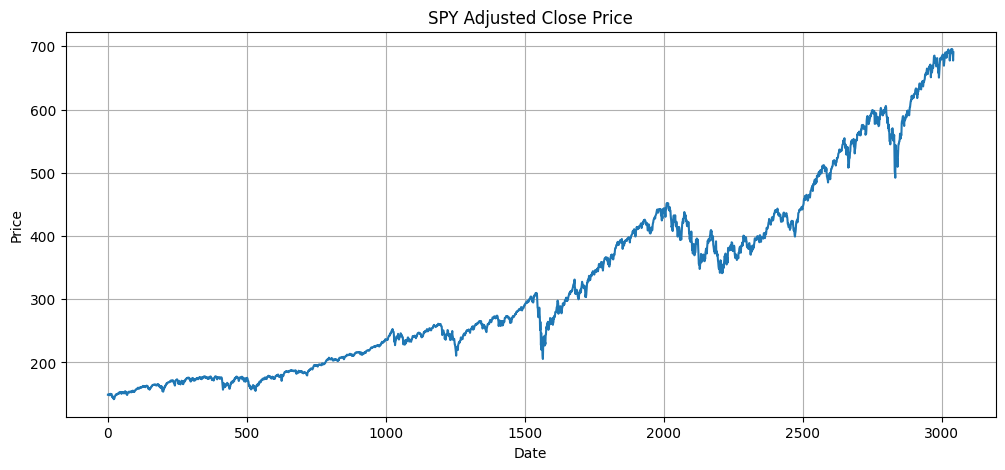

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["Adj Close"])
plt.title(f"{ticker} Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Compute Returns (Simple + Log Returns)

In [8]:
data["simple_return"] = data["Adj Close"].pct_change()
data["log_return"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))

In [9]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
0,2014-01-02,148.986023,182.919998,184.070007,182.479996,183.979996,119636900,NaN,NaN
1,2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600,-0.000164,-0.000164
2,2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200,-0.002898,-0.002902
3,2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200,0.006142,0.006123
4,2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300,0.000218,0.000218


In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
1,2014-01-03,148.961609,182.889999,183.600006,182.630005,183.229996,81390600,-0.000164,-0.000164
2,2014-01-06,148.529938,182.360001,183.559998,182.080002,183.490005,108028200,-0.002898,-0.002902
3,2014-01-07,149.442169,183.479996,183.789993,182.949997,183.089996,86144200,0.006142,0.006123
4,2014-01-08,149.474777,183.520004,183.830002,182.889999,183.449997,96582300,0.000218,0.000218
5,2014-01-09,149.572510,183.639999,184.130005,182.800003,184.110001,90683400,0.000654,0.000654


# Plot Log Returns Time Series

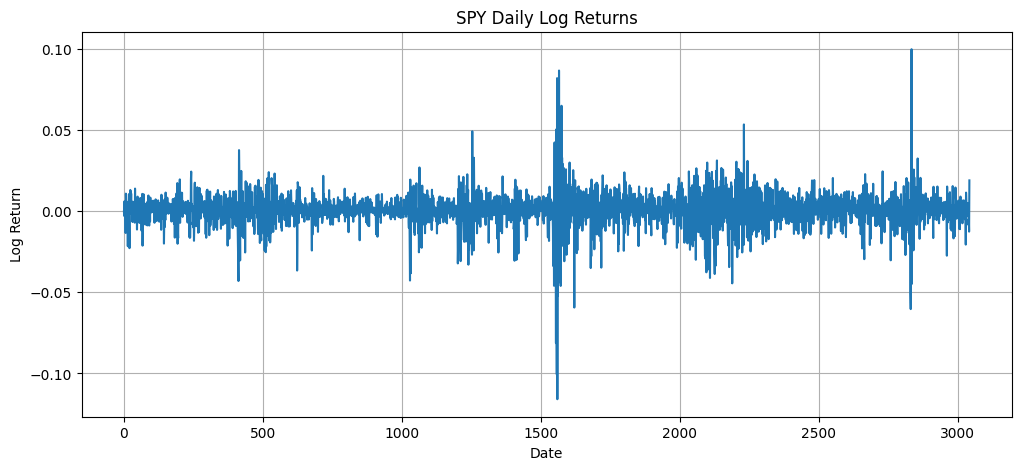

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["log_return"])
plt.title(f"{ticker} Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

# Numerical Location and Shape of Log return

In [13]:
log_returns = data["log_return"]

mean_daily = log_returns.mean()
std_daily = log_returns.std()
var_daily = log_returns.var()
min_daily = log_returns.min()
max_daily = log_returns.max()

skewness = stats.skew(log_returns)
kurtosis = stats.kurtosis(log_returns, fisher=False)

print("-----DAILY RETURN STATISTICS-----")
print(f"Mean Daily Return     : {mean_daily:.6f}")
print(f"Std Daily Return      : {std_daily:.6f}")
print(f"Variance Daily Return : {var_daily:.6f}")
print(f"Min Daily Return      : {min_daily:.6f}")
print(f"Max Daily Return      : {max_daily:.6f}")
print(f"Skewness              : {skewness:.6f}")
print(f"Kurtosis              : {kurtosis:.6f}")

-----DAILY RETURN STATISTICS-----
Mean Daily Return     : 0.000504
Std Daily Return      : 0.010921
Variance Daily Return : 0.000119
Min Daily Return      : -0.115886
Max Daily Return      : 0.099863
Skewness              : -0.588438
Kurtosis              : 17.913813


# Annualized Return and Volatility

In [ ]:
trading_days = 252

mean_annual = mean_daily * trading_days
std_annual = std_daily * np.sqrt(trading_days)
# variance = sigma^2 * T so, sigma_annual = sqrt(variance_annual) = sqrt(sigma^2 * T) = sigma * sqrt(T)

print("----ANNUALIZED METRICS----")
print(f"Annualized Return     : {mean_annual:.6f}")
print(f"Annualized Volatility : {std_annual:.6f}")

----ANNUALIZED METRICS----
Annualized Return     : 0.127055
Annualized Volatility : 0.173364


# Histogram of Log Returns

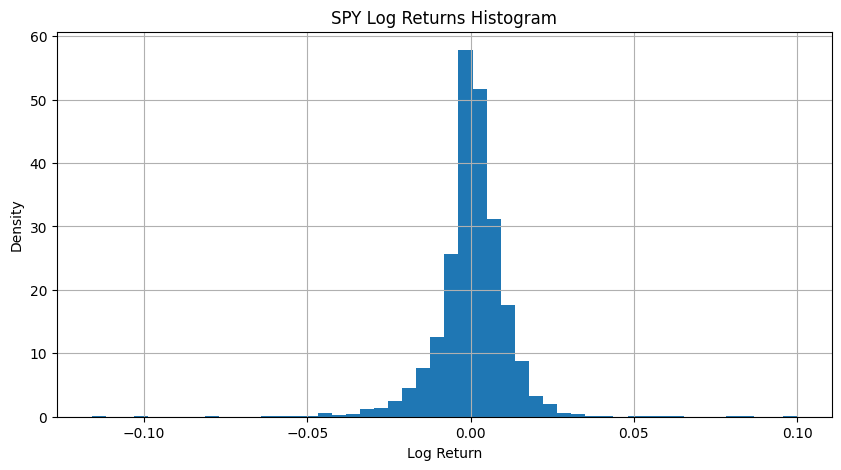

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(log_returns, bins=50, density=True)
plt.title(f"{ticker} Log Returns Histogram")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# Real Returns vs Normal Distribution(graphical)

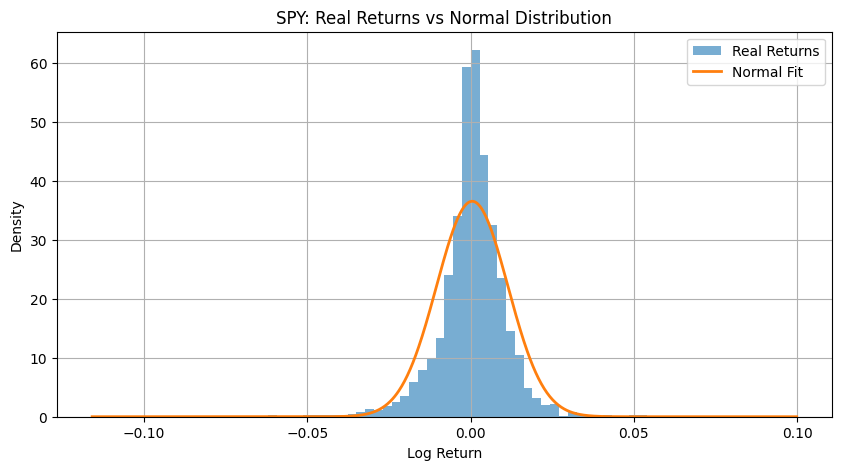

In [21]:
x = np.linspace(log_returns.min(), log_returns.max(), 1000)
normal_pdf = stats.norm.pdf(x, loc=mean_daily, scale=std_daily)

plt.figure(figsize=(10, 5))

plt.hist(log_returns, bins=80, density=True, alpha=0.6, label="Real Returns")
plt.plot(x, normal_pdf, linewidth=2, label="Normal Fit")

plt.title(f"{ticker}: Real Returns vs Normal Distribution")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()